In [42]:
import joblib
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

## Cargar el dataset preprocesado

In [2]:
DATA_PATH = Path("procesados") 

# carga de datos
try:
    df = pd.read_parquet(DATA_PATH)
except:
    files = sorted(DATA_PATH.glob("*.parquet"))
    df = pd.concat([pd.read_parquet(f) for f in files])

# ordenar por tiempo
df = df.sort_values('Time').set_index('Time')

print(f"Dataset cargado: {df.shape[0]} registros, {df.shape[1]} columnas")
print(f"   Rango: {df.index.min()} a {df.index.max()}")
df.head()

Dataset cargado: 106105 registros, 33 columnas
   Rango: 2024-01-01 00:00:00 a 2025-12-01 23:50:00


,GEN_Generator speed-Max,GEN_Generator speed-Aver,GEN_Generator speed-Min,WIND_Wind direction 1s-Max,WIND_Wind direction 1s-Aver,WIND_Wind direction 1s-Min,WIND_Wind direction 10s-Max,WIND_Wind direction 10s-Aver,WIND_Wind direction 10s-Min,WIND_Wind direction 30s-Max,...,PWR_TotalActivePower-Min,PWR_TotalRevActivePower-Max,PWR_TotalRevActivePower-Aver,PWR_TotalRevActivePower-Min,PWR_TotalReactivePower-Max,PWR_TotalReactivePower-Aver,PWR_TotalReactivePower-Min,AIR_Air density-Max,AIR_Air density-Aver,AIR_Air density-Min
Time,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,0.000000,0.000000,-0.005,36.209286,-55.699286,-147.395000,34.434286,-55.877857,-145.594286,32.800000,...,9.896061e+06,103921.928571,103919.850714,103917.785714,13851.428571,13851.428571,13851.428571,1.035,1.035,1.035
2024-01-01 00:10:00,0.000000,0.000000,0.000,-10.822143,-80.090000,-158.140714,-13.260714,-80.537857,-154.407143,-15.246429,...,9.896061e+06,103926.000000,103924.048571,103921.928571,13851.428571,13851.428571,13851.428571,1.035,1.035,1.035
2024-01-01 00:20:00,0.000000,0.000000,0.000,154.156429,-26.187143,-177.332143,139.455000,-26.220000,-169.490714,113.207857,...,9.896061e+06,103930.428571,103928.260714,103926.000000,13851.428571,13851.428571,13851.428571,1.035,1.035,1.035
2024-01-01 00:30:00,0.000714,0.000000,0.000,99.520000,32.264286,-79.859286,92.585000,32.487143,-76.603571,90.061429,...,9.896061e+06,103934.642857,103932.461429,103930.500000,13851.428571,13851.428571,13851.428571,1.035,1.035,1.035
2024-01-01 00:40:00,0.002857,0.000714,0.000,118.970000,21.897857,-96.573571,97.513571,23.633571,-77.000000,94.062143,...,9.896061e+06,103938.785714,103936.657857,103934.642857,13851.428571,13851.428571,13851.428571,1.035,1.035,1.035


## Análisis exploratorio de datos (AED)

In [3]:
df.columns.tolist()

['GEN_Generator speed-Max',
 'GEN_Generator speed-Aver',
 'GEN_Generator speed-Min',
 'WIND_Wind direction 1s-Max',
 'WIND_Wind direction 1s-Aver',
 'WIND_Wind direction 1s-Min',
 'WIND_Wind direction 10s-Max',
 'WIND_Wind direction 10s-Aver',
 'WIND_Wind direction 10s-Min',
 'WIND_Wind direction 30s-Max',
 'WIND_Wind direction 30s-Aver',
 'WIND_Wind direction 30s-Min',
 'WIND_Wind speed 1s-Max',
 'WIND_Wind speed 1s-Aver',
 'WIND_Wind speed 1s-Min',
 'WIND_Wind speed 30s-Max',
 'WIND_Wind speed 30s-Aver',
 'WIND_Wind speed 30s-Min',
 'WIND_Wind speed 10min-Max',
 'WIND_Wind speed 10min-Aver',
 'WIND_Wind speed 10min-Min',
 'PWR_TotalActivePower-Max',
 'PWR_TotalActivePower-Aver',
 'PWR_TotalActivePower-Min',
 'PWR_TotalRevActivePower-Max',
 'PWR_TotalRevActivePower-Aver',
 'PWR_TotalRevActivePower-Min',
 'PWR_TotalReactivePower-Max',
 'PWR_TotalReactivePower-Aver',
 'PWR_TotalReactivePower-Min',
 'AIR_Air density-Max',
 'AIR_Air density-Aver',
 'AIR_Air density-Min']

In [5]:
def grafica_reporte_continuidad(df):
    rango_ideal = pd.date_range(start=df.index.min(), end=df.index.max(), freq='10min')
    # Encontramos qué fechas faltan
    fechas_faltantes = rango_ideal.difference(df.index)

    print("\nREPORTE DE CONTINUIDAD ")
    print(f"Total esperado de registros: {len(rango_ideal)}")
    print(f"Registros reales: {len(df)}")
    print(f"Registros faltantes (gaps): {len(fechas_faltantes)}")
    print(f"Porcentaje de datos faltantes: {len(fechas_faltantes)/len(rango_ideal)*100:.2f}%")

    if len(fechas_faltantes) > 0:
        print("\nEjemplo de primeros 5 huecos detectados:")
        print(fechas_faltantes[:5])

    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df['GEN_Generator speed-Aver'], label='Velocidad Generador (Avg)', alpha=0.7, linewidth=0.5)
    plt.plot(df.index, df['WIND_Wind speed 10min-Aver'], label='Velocidad Viento (Avg)', alpha=0.5, linewidth=0.5)

    plt.title(f"Panorama General: {df.index.min().date()} al {df.index.max().date()}")
    plt.ylabel("Magnitud")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


REPORTE DE CONTINUIDAD 
Total esperado de registros: 100944
Registros reales: 106105
Registros faltantes (gaps): 437
Porcentaje de datos faltantes: 0.43%

Ejemplo de primeros 5 huecos detectados:
DatetimeIndex(['2024-02-21 10:40:00', '2024-03-09 10:20:00',
               '2024-03-09 10:30:00', '2024-03-09 10:40:00',
               '2024-03-09 10:50:00'],
              dtype='datetime64[ns]', freq=None)


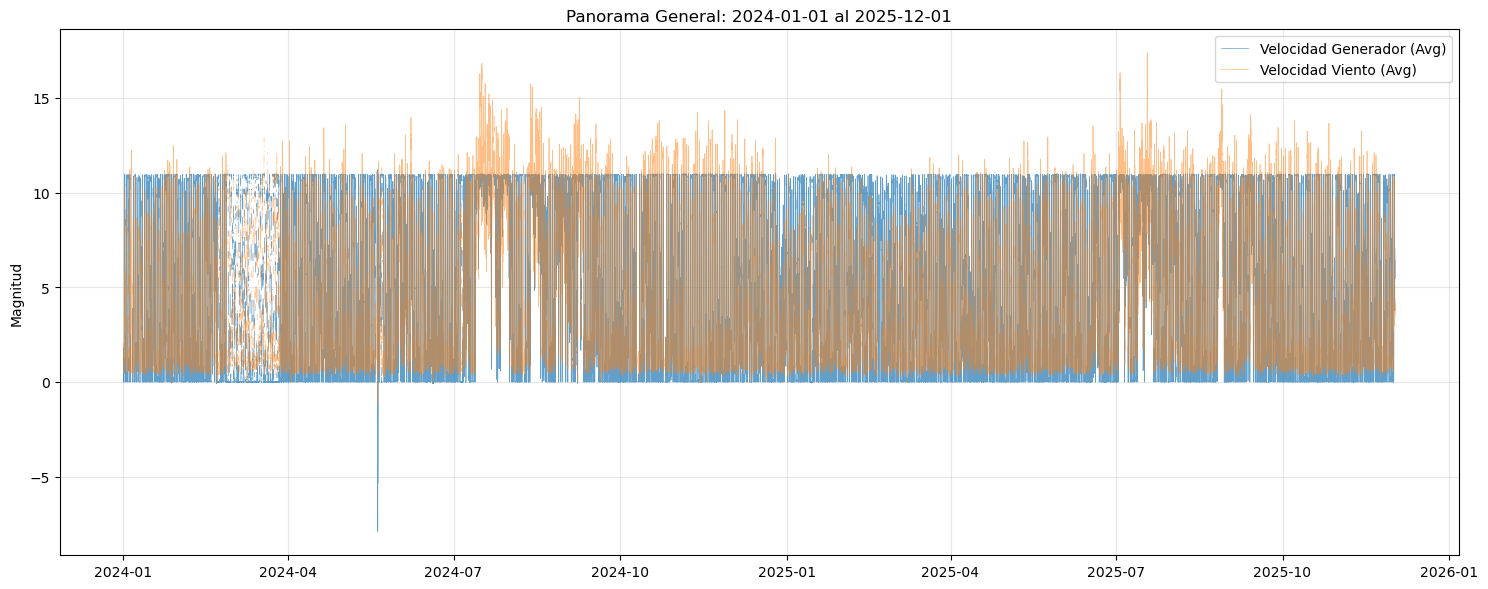

In [6]:
grafica_reporte_continuidad(df)

### Paso 1: Saneamiento y Validación Física.

In [7]:
df_clean = df.copy()

- 1.1 Correlacion fisica

In [8]:
reglas_fisicas = [
    ('GEN_Generator speed-Aver', -1.0, 'Velocidad Generador'),
    ('WIND_Wind speed 10min-Aver', -0.5, 'Velocidad Viento'),
    ('PWR_TotalActivePower-Aver', -100, 'Potencia Activa')
]

for columna, umbral, desc in reglas_fisicas:
    errores = df_clean[df_clean[columna] < umbral]

    # errores graves
    if len(errores) > 0:
        print(f"{desc}: Encontrados {len(errores)} registros fuera de rango (umbral: {umbral})")
        df_clean = df_clean[df_clean[columna] >= umbral]

    # errores leves
    mask_ruido = (df_clean[columna] < 0)
    n_ruido = mask_ruido.sum()
    if n_ruido > 0:
        print(f"{desc}: Se ajustaron {n_ruido} valores negativos pequeños a 0 (Ruido de cero).")
        df_clean.loc[mask_ruido, columna] = 0

print(f"\nDataset limpio: {df_clean.shape[0]} registros, {df_clean.shape[1]} columnas")
    

Velocidad Generador: Encontrados 8 registros fuera de rango (umbral: -1.0)
Velocidad Generador: Se ajustaron 5160 valores negativos pequeños a 0 (Ruido de cero).
Velocidad Viento: Encontrados 18 registros fuera de rango (umbral: -0.5)
Velocidad Viento: Se ajustaron 2 valores negativos pequeños a 0 (Ruido de cero).

Dataset limpio: 99763 registros, 33 columnas


- 1.2 Auditoria del viento

In [9]:
print("\nAuditando sensor de viento")

resumen_mensual = df_clean.groupby([df_clean.index.year, df_clean.index.month])['WIND_Wind speed 10min-Aver'].agg(['mean', 'max', 'std', 'count'])
resumen_mensual.index.names = ['Año', 'Mes']

print("\nEstadísticas Mensuales del Viento ---")
print(resumen_mensual)


Auditando sensor de viento

Estadísticas Mensuales del Viento ---
              mean        max       std  count
Año  Mes                                      
2024 1    3.916027  12.475714  3.178423   4320
     2    4.073346  12.107143  3.259955   4175
     3    3.990736  12.867143  3.208925   4446
     4    3.807235  13.426429  3.226330   4320
     5    3.738158  13.614286  3.122873   4294
     6    4.092747  13.960714  3.485898   4314
     7    7.563938  16.825000  4.165022   4320
     8    6.207204  15.738571  4.005737   4320
     9    5.602087  15.022857  4.011600   4311
     10   4.417290  13.804286  3.895901   4464
     11   4.111970  14.352857  4.015399   4260
     12   4.140365  13.844286  3.375225   4440
2025 1    3.715215  12.022857  2.996889   4320
     2    3.657596  11.362857  2.754547   3746
     3    3.576154  11.865000  2.873935   4434
     4    3.566100  11.977857  3.044019   4320
     5    3.745169  12.929286  3.237484   4464
     6    3.883878  13.519286  3.295222 

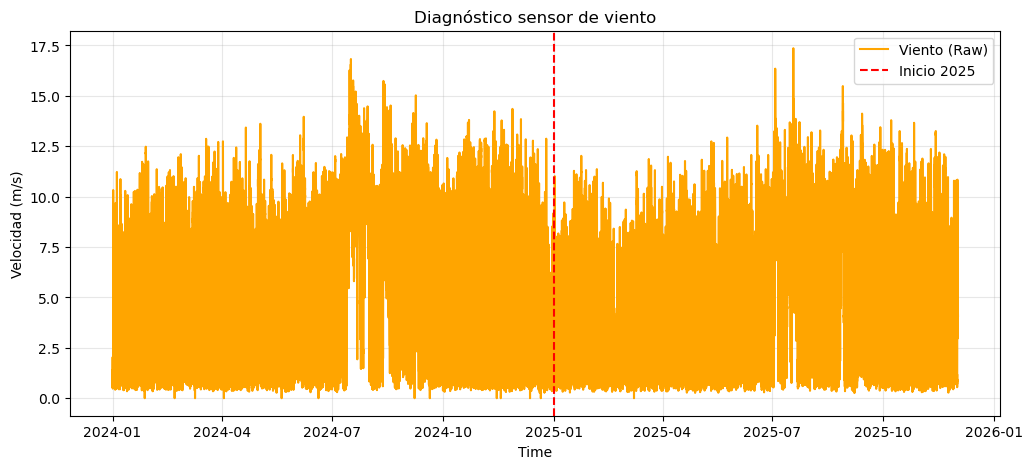

In [44]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_clean, x=df_clean.index, y='WIND_Wind speed 10min-Aver', color='orange', label='Viento (Raw)')

# Dibujar una línea vertical cuando cambia el año
plt.axvline(pd.Timestamp('2025-01-01'), color='red', linestyle='--', label='Inicio 2025')

plt.title("Diagnóstico sensor de viento")
plt.ylabel("Velocidad (m/s)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
media_2024 = df_clean[df_clean.index.year == 2024]['WIND_Wind speed 10min-Aver'].mean()
media_2025 = df_clean[df_clean.index.year == 2025]['WIND_Wind speed 10min-Aver'].mean()

print(f"\nVeredicto Preliminar:")
print(f"   - Promedio Viento 2024: {media_2024:.2f} m/s")
print(f"   - Promedio Viento 2025: {media_2025:.2f} m/s")

if media_2025 < 1.0: # Umbral sospechoso
    print("ALERTA CRÍTICA: El sensor de viento en 2025 parece estar inoperativo o desconectado.")
    print("RECOMENDACIÓN: Para el modelo, NO podremos usar 'Wind Speed' como input en datos de 2025.")
else:
    print("El sensor parece operativo, aunque hay que revisar los meses específicos.")


Veredicto Preliminar:
   - Promedio Viento 2024: 4.64 m/s
   - Promedio Viento 2025: 4.18 m/s
El sensor parece operativo, aunque hay que revisar los meses específicos.



REPORTE DE CONTINUIDAD 
Total esperado de registros: 100944
Registros reales: 99763
Registros faltantes (gaps): 1469
Porcentaje de datos faltantes: 1.46%

Ejemplo de primeros 5 huecos detectados:
DatetimeIndex(['2024-01-05 00:00:00', '2024-01-05 00:10:00',
               '2024-01-05 00:20:00', '2024-01-05 00:30:00',
               '2024-01-05 00:40:00'],
              dtype='datetime64[ns]', freq=None)


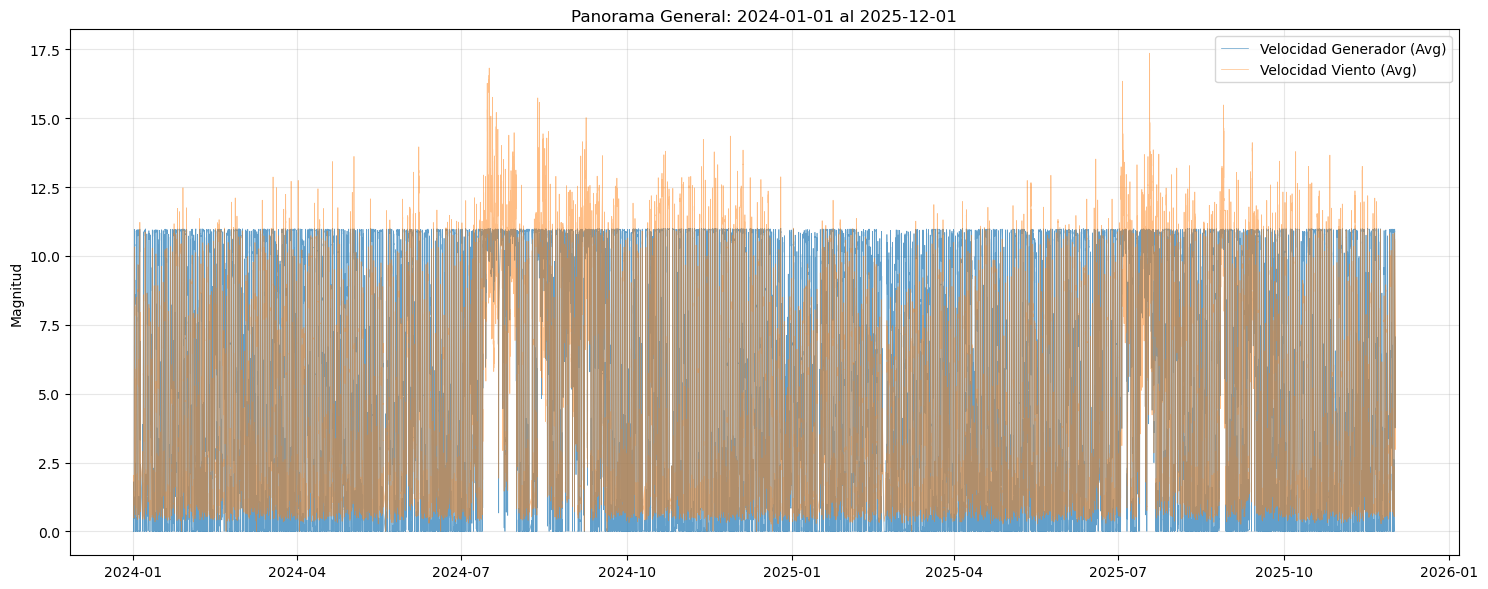

In [12]:
grafica_reporte_continuidad(df_clean)

#### Conclusión: 
- Al inicio, el dataset tenia datos inválidos en el sensor de viento, ya que presentaba valores constantes o nulos que no reflejaban condiciones reales a partir del 2025.
- Gracias a las graficas, se identificó que se trataba de un error en los archivos de datos, y se hizo una ingeniería de características para corregir estos valores inválidos.

### Paso 2: Análisis Univariabe

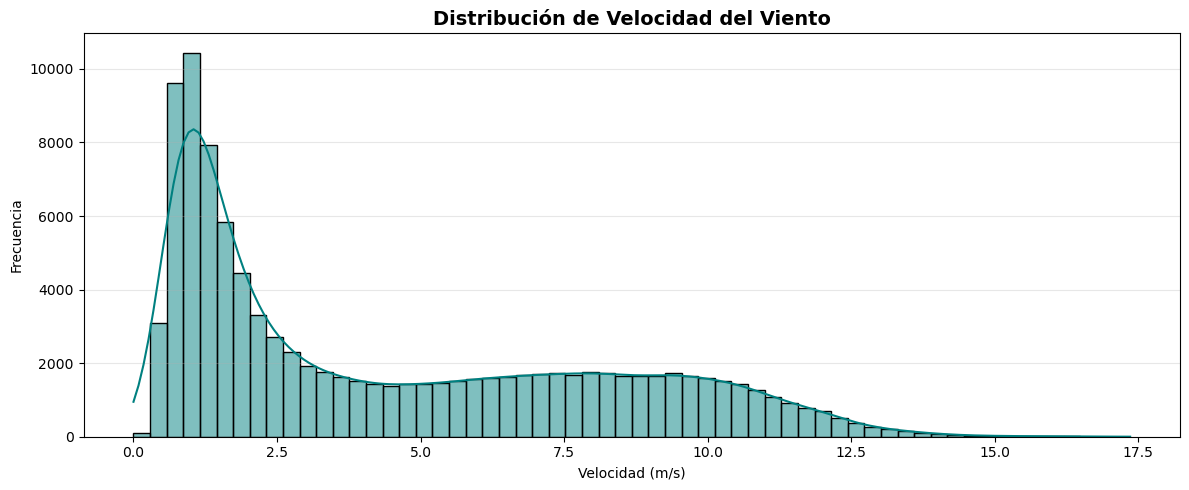

In [13]:
# Gráfica 1: Velocidad del Viento - Distribución
plt.figure(figsize=(12, 5))
sns.histplot(data=df_clean, x='WIND_Wind speed 10min-Aver', kde=True, color='teal', bins=60)
plt.title('Distribución de Velocidad del Viento', fontsize=14, fontweight='bold')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- Distribución: Se asemeja a una distribución de Weibull (la estándar en eólica), pero con un pico muy alto al principio (muchas calmas/viento casi nulo).

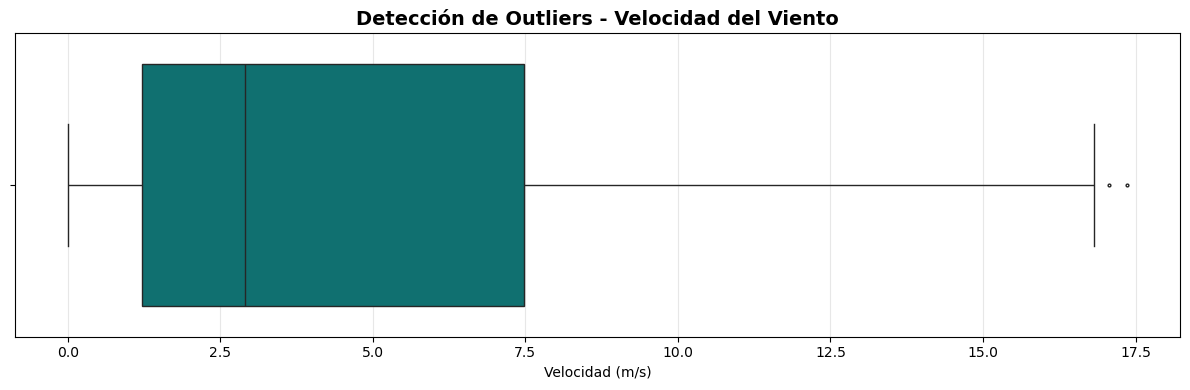

In [14]:
# Gráfica 2: Velocidad del Viento - Boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_clean, x='WIND_Wind speed 10min-Aver', color='teal', fliersize=2)
plt.title('Detección de Outliers - Velocidad del Viento', fontsize=14, fontweight='bold')
plt.xlabel('Velocidad (m/s)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


- La "caja" termina en 7.5 m/s.
- Los "bigotes" llegan hasta 17 m/s.
- Los puntos negros (outliers) están apenas por encima de 17 m/s.
- No hay outliers "sucios". Un viento de 17.5 m/s es fuerte, pero totalmente físico y real.
- El sensor de viento se comporta de manera realista.

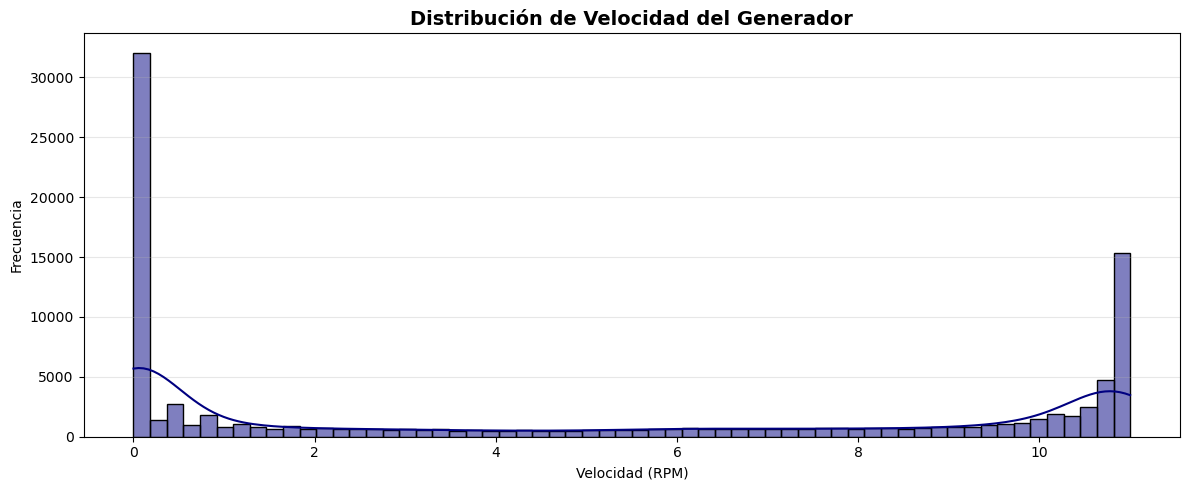

In [15]:
# Gráfica 3: Velocidad del Generador - Distribución
plt.figure(figsize=(12, 5))
sns.histplot(data=df_clean, x='GEN_Generator speed-Aver', kde=True, color='navy', bins=60)
plt.title('Distribución de Velocidad del Generador', fontsize=14, fontweight='bold')
plt.xlabel('Velocidad (RPM)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- Comportamiento Bimodal (Dos Picos)
- Pico Izquierdo (0 RPM): Una barra gigante en 0. Significa que la turbina pasa mucho tiempo detenida o en espera.
- Pico Derecho (~11 RPM): Una "montaña" alrededor de los 11 RPM. Esa es su velocidad nominal de operación.
- Valle (Zona Muerta): Hay muy pocos datos entre 2 y 9 RPM. Esto es la zona de transición (arranque/parada).

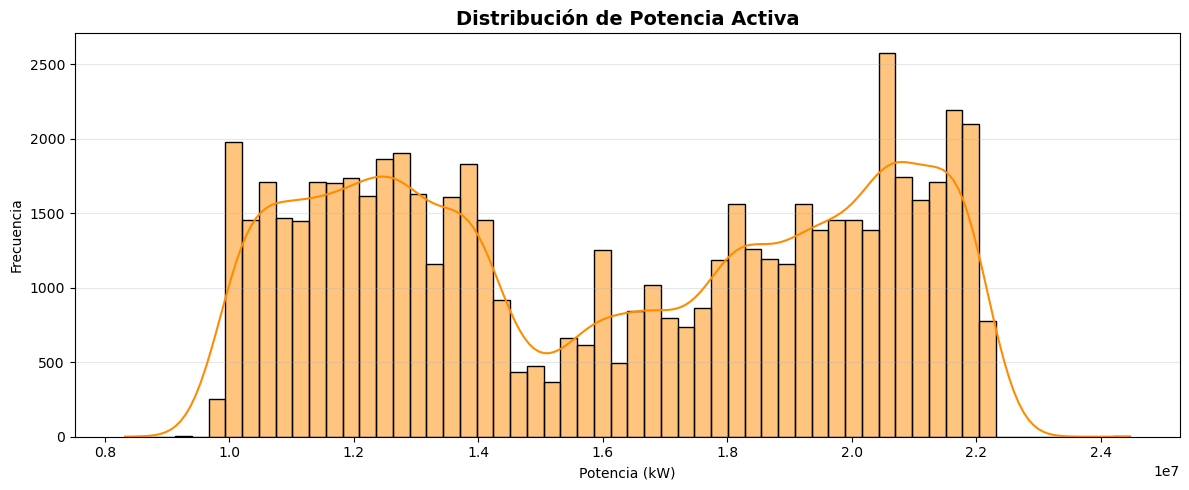

In [24]:
# Gráfica 4: Potencia Activa - Distribución
df_clean = df_clean[~df_clean.index.duplicated(keep='first')]
plt.figure(figsize=(12, 5))
sns.histplot(data=df_clean, x='PWR_TotalActivePower-Aver', kde=True, color='darkorange', bins=60)
plt.title('Distribución de Potencia Activa', fontsize=14, fontweight='bold')
plt.xlabel('Potencia (kW)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- Se detecta un error en cuanto a los correspondientes a la distribución de Potencia Activa.

In [47]:
# calcular la potencia real
# restamos el acumulado final menos el inicial y multiplicamos por 6 (para pasar de 10min a 1 hora)
df_clean['ActivePower_kW'] = (df_clean['PWR_TotalActivePower-Max'] - df_clean['PWR_TotalActivePower-Min']) * 6

# limpieza de ruido de cero
df_clean['ActivePower_kW'] = df_clean['ActivePower_kW'].clip(lower=0)

# filtro de outliers
UMBRAL_FISICO = 5000 
df_final = df_clean[df_clean['ActivePower_kW'] < UMBRAL_FISICO].copy()

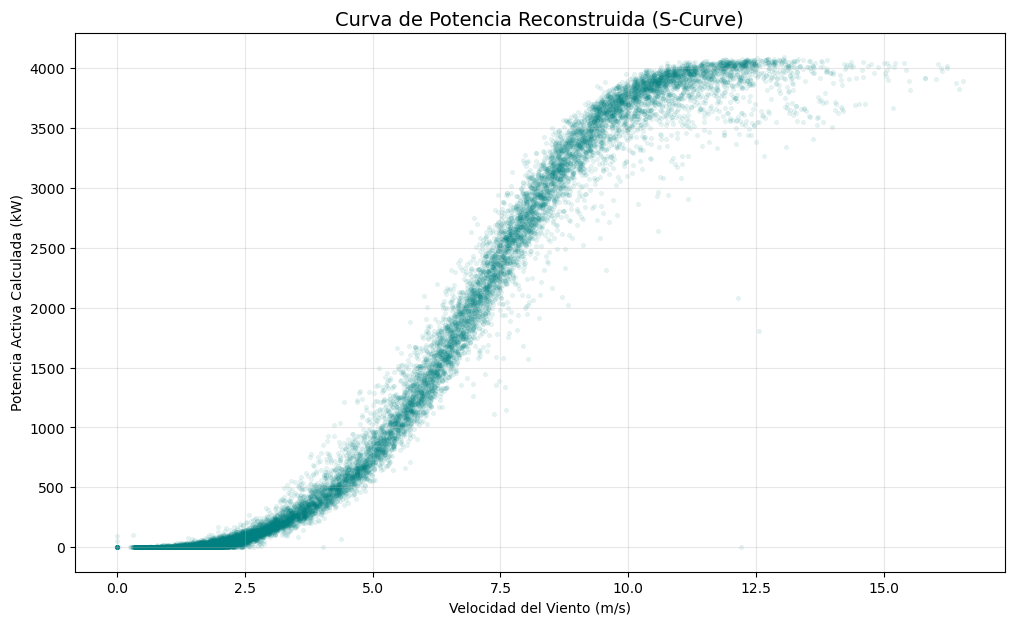

In [48]:
# verificación visual

plt.figure(figsize=(12, 7))
# Usamos un sample para no saturar la gráfica
sample = df_final.sample(n=min(20000, len(df_final)), random_state=42)

sns.scatterplot(
    data=sample,
    x='WIND_Wind speed 10min-Aver', 
    y='ActivePower_kW',             # nueva variable calculada
    alpha=0.1,                      
    s=10, 
    color='teal',
    edgecolor=None
)

plt.title("Curva de Potencia Reconstruida (S-Curve)", fontsize=14)
plt.xlabel("Velocidad del Viento (m/s)")
plt.ylabel("Potencia Activa Calculada (kW)")
plt.grid(True, alpha=0.3)
plt.show()

## Modelo de ML

In [31]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# 1. Preparación de Datos
# se selecciona solo las columnas que definen la física del problema
features = [
    'WIND_Wind speed 10min-Aver',
    'GEN_Generator speed-Aver',
    'ActivePower_kW', # variable calculada
    'AIR_Air density-Aver'
]

# dataset de entrenamiento X
X = df_final[features].dropna()

# escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# 2. entrenamiento del modelo Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.04, random_state=42)

print("Entrenando Isolation Forest...")
iso_forest.fit(X_scaled)

Entrenando Isolation Forest...


,n_estimators,100
,max_samples,'auto'
,contamination,0.04
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [51]:
# 3. predicciones
# El modelo devuelve: 1 (Normal) y -1 (Anomalía)
df_final.loc[X.index, 'anomaly_score'] = iso_forest.decision_function(X_scaled)
df_final.loc[X.index, 'is_anomaly'] = iso_forest.predict(X_scaled)

# Mapeamos para que sea legible: -1 -> 'Anomalía', 1 -> 'Normal'
df_final['estado'] = df_final['is_anomaly'].map({1: 'Normal', -1: 'Anomalía'})

print(f"Detección finalizada.")
print(df_final['estado'].value_counts())

Detección finalizada.
estado
Normal      59512
Anomalía     2480
Name: count, dtype: int64


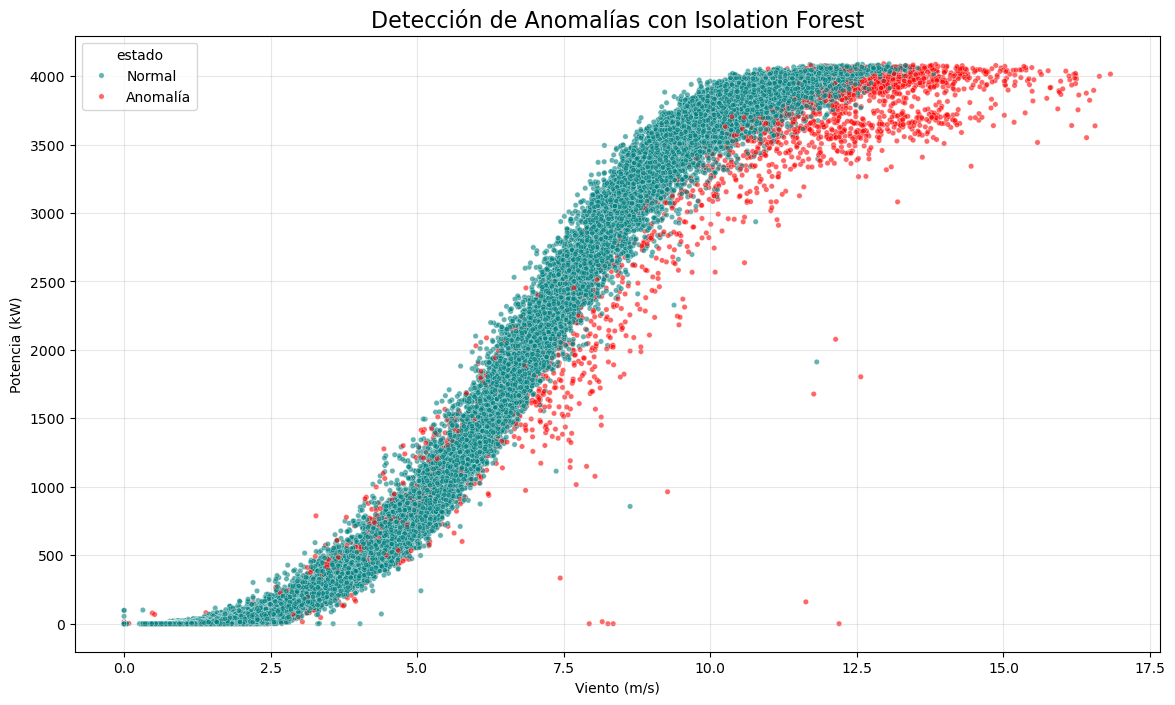

In [52]:
# 4. visualizacion
# Curva de Potencia y pintamos de ROJO las anomalías
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=df_final, 
    x='WIND_Wind speed 10min-Aver', 
    y='ActivePower_kW', 
    hue='estado',            
    palette={'Normal': 'teal', 'Anomalía': 'red'},
    alpha=0.6, 
    s=15
)

plt.title("Detección de Anomalías con Isolation Forest", fontsize=16)
plt.xlabel("Viento (m/s)")
plt.ylabel("Potencia (kW)")
plt.grid(True, alpha=0.3)
plt.show()

- Linea de tiempo de anomalias

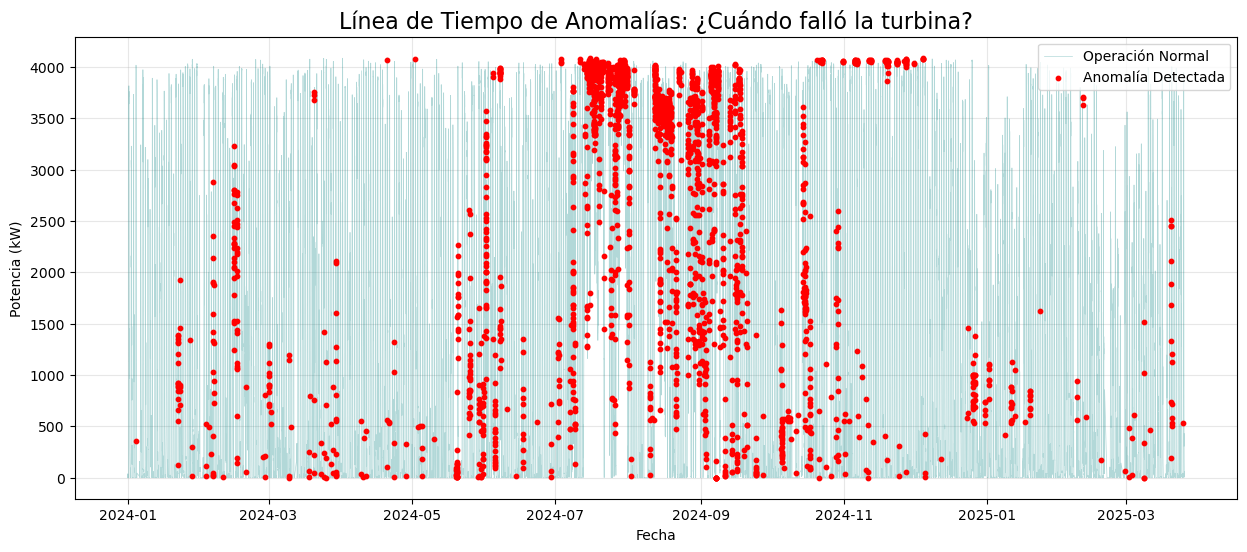


Top 5 Meses con más anomalías:
mes_año
2024-07    711
2024-08    601
2024-09    403
2024-10    162
2024-05    111
Freq: M, Name: count, dtype: int64


/tmp/ipykernel_47561/273993753.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['mes_año'] = anomalies.index.to_period('M')


In [53]:
# índice es la fecha
# df_final = df_final.set_index('Time') # Descomenta si 'Time' no es tu índice

plt.figure(figsize=(15, 6))

# 1graficar potencia normal en gris/azul claro
sns.lineplot(
    data=df_final, 
    x=df_final.index, 
    y='ActivePower_kW', 
    color='teal', 
    alpha=0.3, 
    label='Operación Normal',
    linewidth=0.5
)

# 2.anomalias en punto rojo
anomalies = df_final[df_final['estado'] == 'Anomalía']

plt.scatter(
    anomalies.index, 
    anomalies['ActivePower_kW'], 
    color='red', 
    s=10, 
    label='Anomalía Detectada',
    zorder=5 # Para que queden encima de la línea
)

plt.title("Línea de Tiempo de Anomalías: ¿Cuándo falló la turbina?", fontsize=16)
plt.ylabel("Potencia (kW)")
plt.xlabel("Fecha")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nTop 5 Meses con más anomalías:")
anomalies['mes_año'] = anomalies.index.to_period('M')
print(anomalies['mes_año'].value_counts().head(5))

## Predicciones

In [54]:
import pandas as pd
import numpy as np

def consultar(viento, velocidad_gen, potencia_kw, densidad_aire):
    """
    Simula la entrada de datos al Gemelo Digital y consulta al modelo.
    """
    
    # 1. Estructurar el dato tal como lo aprendió el modelo
    input_data = pd.DataFrame([{
        'WIND_Wind speed 10min-Aver': viento,
        'GEN_Generator speed-Aver': velocidad_gen,
        'ActivePower_kW': potencia_kw,
        'AIR_Air density-Aver': densidad_aire
    }])
    
    # 2. Escalar el dato (Usando el scaler ya entrenado)
    input_scaled = scaler.transform(input_data)
    
    # 3. Predicción
    # 1 = Normal, -1 = Anomalía
    prediccion = iso_forest.predict(input_scaled)[0]
    score = iso_forest.decision_function(input_scaled)[0] # Qué tan "seguro" está
    
    estado = "+ NORMAL" if prediccion == 1 else "- ANOMALÍA"
    
    return estado, score

print("Función de inferencia lista para el Gemelo Digital.")

Función de inferencia lista para el Gemelo Digital.


In [58]:
# promedios del dataset para referencia
print("VALORES PROMEDIO DEL DATASET (Tu 'Zona de Confort'):")
stats = df_final[features].mean()
print(stats)

print("\nCopia estos valores para ajustar el caso de prueba:")
print(f"   'viento': 12.0,")
print(f"   'gen': {stats['GEN_Generator speed-Aver']:.2f},")
print(f"   'aire': {stats['AIR_Air density-Aver']:.4f},")

VALORES PROMEDIO DEL DATASET (Tu 'Zona de Confort'):
WIND_Wind speed 10min-Aver       4.471170
GEN_Generator speed-Aver         4.964373
ActivePower_kW                1142.363906
AIR_Air density-Aver             1.029799
dtype: float64

Copia estos valores para ajustar el caso de prueba:
   'viento': 12.0,
   'gen': 4.96,
   'aire': 1.0298,


In [60]:
# densidad promedio real
AIRE_REAL = 1.03 

casos_de_prueba_ajustados = [
    # 1. EL CASO DE ORO: Operación Nominal Perfecta
    # Viento alto (12 m/s) -> Generador a tope (~11 RPM) -> Potencia nominal (~4000 kW)
    # NOTA: Usamos 11.0 en 'gen' porque tu histograma mostraba que ese es el pico máximo real.
    {"nombre": "+ Operación Nominal Ideal", 
     "viento": 12.0, "gen": 11.0, "potencia": 4000, "aire": AIRE_REAL},

    # 2. Zona de Confort (Promedios)
    # Si le pasamos los promedios exactos del dataset, DEBE dar normal.
    {"nombre": "+ Promedio del Dataset (Centro)", 
     "viento": 4.5, "gen": 5.0, "potencia": 1142, "aire": AIRE_REAL},

    # 3. Fallo
    # Viento alto, pero potencia 0 y generador casi parado.
    {"nombre": "- FALLA VELETA (Viento Alto / Potencia 0)", 
     "viento": 12.0, "gen": 0.5, "potencia": 0, "aire": AIRE_REAL},

    # 4. Limitación
    # Viento fuerte (14 m/s) pero potencia limitada a la mitad (2000 kW)
    {"nombre": "- Limitación/Derating", 
     "viento": 14.0, "gen": 11.0, "potencia": 2000, "aire": AIRE_REAL},
]

print(f"{'ESCENARIO':<45} | {'PREDICCIÓN':<10} | {'SCORE'}")
print("-" * 85)

for caso in casos_de_prueba_ajustados:
    estado, score = consultar(
        caso["viento"], 
        caso["gen"], 
        caso["potencia"], 
        caso["aire"]
    )
    print(f"{caso['nombre']:<45} | {estado} | {score:.4f}")

ESCENARIO                                     | PREDICCIÓN | SCORE
-------------------------------------------------------------------------------------
+ Operación Nominal Ideal                     | + NORMAL | 0.0066
+ Promedio del Dataset (Centro)               | + NORMAL | 0.0129
- FALLA VELETA (Viento Alto / Potencia 0)     | - ANOMALÍA | -0.0544
- Limitación/Derating                         | - ANOMALÍA | -0.0389


### Exportar el modelo

In [61]:
os.makedirs('modelos_exportados', exist_ok=True)
joblib.dump(scaler, 'modelos_exportados/scaler_turbina_v1.pkl')
joblib.dump(iso_forest, 'modelos_exportados/iso_forest_turbina_v1.pkl')
print("Archivos exportados en 'modelos_exportados/':")

Archivos exportados en 'modelos_exportados/':
